In [90]:
using Revise
include("../src/update.jl")

makeDistrib (generic function with 1 method)

In [91]:
M = Model(N=10^5,T=8,γp=0.15,λp=0.2,distribution=Dirac(3),dilution=0.5);

In [95]:
using ProgressMeter
function Callback(iterations)
    p = Progress(iterations)
    function callback(it, M)
        next!(p)
    end
end

iterations = 100

using Profile
Profile.clear()
@profile pop_dynamics!(M; iterations, callback = Callback(iterations))

Progress:  71%|█████████████████████████████▏           |  ETA: 0:00:27

LoadError: InterruptException:

In [93]:
using Plots
N, T = popsize(M), M.T
omarg2D = fill(0.0, 0:T+1, 0:T+1)
for i in 1:N
    for t in 0:T+1
        omarg2D[t, M.τbelief[i]] += M.belief[t,i]/N
    end
end
marg2D = omarg2D.parent;

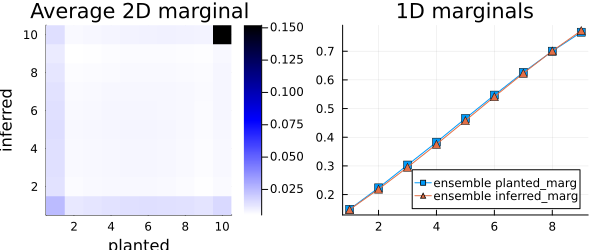

In [94]:
pheat = heatmap((marg2D'),c=[:white,:blue,:black],xlabel="planted",ylabel="inferred",title="Average 2D marginal")
p0 = plot(cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1),marker=:square,label="ensemble planted_marg",title="1D marginals")
p0 = plot!(cumsum(sum(marg2D,dims=2)[1:end-1],dims=1),marker=:utriangle,label="ensemble inferred_marg",legend=:bottomright)
plot(pheat,p0,size=(600,250))

In [76]:
[cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1) cumsum(sum(marg2D,dims=2)[1:end-1],dims=1)]

9×2 Matrix{Float64}:
 0.156   0.14905
 0.2345  0.220961
 0.3134  0.297772
 0.398   0.378378
 0.4813  0.461303
 0.562   0.544713
 0.6377  0.62646
 0.71    0.704145
 0.7748  0.775206

In [70]:
M.belief[:,1]

10-element OffsetArray(::Vector{Float64}, 0:9) with eltype Float64 with indices 0:9:
 0.14199992631708452
 0.0582745816220569
 0.06911973537312432
 0.08143523735300923
 0.0927875004785745
 0.09971964218607893
 0.0985248681117109
 0.08715835016746984
 0.06813744676542305
 0.20284271162546777